In [45]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
dataset_completo = pd.read_csv('../CSVs/Dataset_practica_completo.csv')
dataset_completo

,Temporada,Jornada,Dif PTOS,Dif POS,Dif FORMA,Dif PTS L/V,Dif G AF,Dif G EC,Target
0,2000-01,11,-0.600,10,0.0,0.000,-0.400,-0.400,L
1,2000-01,11,0.200,-1,4.0,0.667,1.600,-0.200,L
2,2000-01,11,0.400,-6,-1.0,0.400,1.000,-0.600,L
3,2000-01,11,-0.300,4,-1.0,-0.134,-0.600,0.800,L
4,2000-01,11,0.000,-1,3.0,0.267,0.600,-0.600,L
...,...,...,...,...,...,...,...,...,...
5455,2020-21,36,0.372,-7,6.0,0.274,0.823,-0.118,L
5456,2020-21,36,0.600,-4,1.0,0.314,0.823,-0.353,L
5457,2020-21,36,-0.057,2,-4.0,0.176,0.176,-0.589,V
5458,2020-21,36,-0.058,1,-1.0,0.000,0.177,-0.177,L


In [47]:
y = dataset_completo['Target']
X = dataset_completo.iloc[:,1:-1]

In [48]:
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=validation_size,
                                                                    random_state=seed)

In [49]:
model = linear_model.LogisticRegression(max_iter = 1000)

In [50]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle =True) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.49885584 0.52402746 0.53318078 0.47597254 0.51716247 0.57665904
 0.49885584 0.53775744 0.50229358 0.46788991]
Logistic Regression: 0.513265 (0.030219)


In [51]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [52]:
model.score(X_test, Y_test)

0.5476190476190477

In [53]:
import pickle

with open('my_model_cmp', 'wb') as archivo_salida:
    pickle.dump(model, archivo_salida)

In [54]:
predicions_proba = model.predict_proba(X_test)
predicions_proba

array([[0.27977913, 0.49300523, 0.22721564],
       [0.28036438, 0.35746356, 0.36217206],
       [0.26468407, 0.50755018, 0.22776575],
       ...,
       [0.26926885, 0.45709933, 0.27363182],
       [0.23037264, 0.62429074, 0.14533662],
       [0.29746513, 0.43911646, 0.26341841]])

In [55]:
predicions = model.predict(X_test)
predicions

array(['L', 'V', 'L', ..., 'L', 'L', 'L'], dtype=object)

In [93]:
from sklearn.inspection import permutation_importance


In [95]:
result = permutation_importance(model, X, y, n_repeats=10,
                                 random_state=0)

In [96]:
result['importances_mean']
z = list(result['importances_mean'])
z

[0.002344322344322336,
 0.0916483516483517,
 0.017216117216117266,
 -3.66300366300365e-05,
 0.0017948717948717886,
 0.01758241758241763,
 0.008388278388278436]

In [97]:
df = pd.DataFrame(z, X.columns, columns=['Permutation importances'])
df

,Permutation importances
Jornada,0.002344
Dif PTOS,0.091648
Dif POS,0.017216
Dif FORMA,-0.000037
Dif PTS L/V,0.001795
Dif G AF,0.017582
Dif G EC,0.008388


In [56]:
y_test_list = list(Y_test)
y_test_list

['L',
 'V',
 'L',
 'L',
 'V',
 'V',
 'E',
 'V',
 'L',
 'L',
 'L',
 'L',
 'V',
 'L',
 'E',
 'L',
 'L',
 'L',
 'L',
 'V',
 'E',
 'V',
 'E',
 'L',
 'E',
 'L',
 'E',
 'V',
 'L',
 'L',
 'L',
 'V',
 'L',
 'V',
 'V',
 'V',
 'V',
 'V',
 'E',
 'L',
 'L',
 'V',
 'V',
 'V',
 'L',
 'V',
 'L',
 'E',
 'E',
 'E',
 'L',
 'L',
 'V',
 'L',
 'L',
 'L',
 'L',
 'V',
 'V',
 'L',
 'V',
 'L',
 'L',
 'L',
 'L',
 'V',
 'E',
 'L',
 'L',
 'V',
 'L',
 'V',
 'E',
 'E',
 'L',
 'V',
 'L',
 'V',
 'E',
 'L',
 'L',
 'E',
 'L',
 'V',
 'L',
 'E',
 'L',
 'V',
 'L',
 'L',
 'L',
 'V',
 'E',
 'L',
 'V',
 'L',
 'E',
 'E',
 'L',
 'L',
 'L',
 'V',
 'E',
 'V',
 'V',
 'L',
 'V',
 'L',
 'V',
 'L',
 'E',
 'E',
 'V',
 'L',
 'V',
 'E',
 'E',
 'L',
 'V',
 'L',
 'L',
 'E',
 'L',
 'L',
 'L',
 'E',
 'L',
 'V',
 'V',
 'L',
 'V',
 'L',
 'E',
 'V',
 'L',
 'V',
 'E',
 'V',
 'L',
 'L',
 'L',
 'V',
 'L',
 'L',
 'V',
 'L',
 'E',
 'E',
 'L',
 'V',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'E',
 'L',
 'V',
 'L',
 'V',
 'E',
 'L',
 'L',
 'V',
 'E',
 'L'

In [57]:
resultados_Y = pd.DataFrame((predicions_proba),columns=[model.classes_])
resultados_Y['Real']=y_test_list
resultados_Y['Predictions'] = predicions
resultados_Y

,E,L,V,Real,Predictions
0,0.279779,0.493005,0.227216,L,L
1,0.280364,0.357464,0.362172,V,V
2,0.264684,0.507550,0.227766,L,L
3,0.194841,0.711943,0.093216,L,L
4,0.255873,0.183109,0.561018,V,V
...,...,...,...,...,...
1087,0.285029,0.515749,0.199223,L,L
1088,0.315677,0.449598,0.234725,L,L
1089,0.269269,0.457099,0.273632,V,L
1090,0.230373,0.624291,0.145337,L,L


In [58]:
resultados_Y.iloc[0,0]

0.2797791329206086

In [59]:
resultados_Y.columns

MultiIndex([(          'E',),
            (          'L',),
            (          'V',),
            (       'Real',),
            ('Predictions',)],
           )

In [60]:
# 1ª Opción Empate
pronóstico_lista_x = []
for i in range(len(resultados_Y)):
    E = resultados_Y.iloc[i,0]
    L = resultados_Y.iloc[i,1]
    V = resultados_Y.iloc[i,2]
    lista = [E,L,V]
    maximo = (max(lista))
    if maximo < 0.6: 
        if lista.index(maximo)==1:
            pronóstico = 'LE'
            pronóstico_lista_x.append(pronóstico)
        elif lista.index(maximo)==2:
            pronóstico = 'EV'
            pronóstico_lista_x.append(pronóstico)
        elif lista.index(maximo)==0:
            pronóstico = 'E'
            pronóstico_lista_x.append(pronóstico)
    else: 
        if lista.index(maximo) ==1: 
            pronóstico = 'L'
            pronóstico_lista_x.append(pronóstico)

        elif lista.index(maximo) ==2: 
            pronóstico = 'V'
            pronóstico_lista_x.append(pronóstico)

        elif lista.index(maximo) ==0: 
            pronóstico = 'E'
            pronóstico_lista_x.append(pronóstico)
    

In [61]:
len(pronóstico_lista_x)

1092

In [62]:
#pronóstico_lista_2aopción
pronóstico_dosopc = []
for i in range(len(resultados_Y)):
    E = resultados_Y.iloc[i,0]
    L = resultados_Y.iloc[i,1]
    V = resultados_Y.iloc[i,2]
    lista = [E,L,V]
    maximo = (max(lista))
    maximo2 = sorted(lista)[1]

    if maximo <= 0.6: 
        if lista.index(maximo)==1 and lista.index(maximo2)==2:
            pronóstico = 'LV'
            pronóstico_dosopc.append(pronóstico)
        elif lista.index(maximo)==1 and lista.index(maximo2)==0:
            pronóstico = 'LE'
            pronóstico_dosopc.append(pronóstico)
        elif lista.index(maximo)==2 and lista.index(maximo2)==1:
            pronóstico = 'VL'
            pronóstico_dosopc.append(pronóstico)
        elif lista.index(maximo)==2 and lista.index(maximo2)==0:
            pronóstico = 'VE'
            pronóstico_dosopc.append(pronóstico)
        elif lista.index(maximo)==0 and lista.index(maximo2)==1:
            pronóstico = 'LE'
            pronóstico_dosopc.append(pronóstico)
        elif lista.index(maximo)==0 and lista.index(maximo2)==2:
            pronóstico = 'VE'
            pronóstico_dosopc.append(pronóstico)    
            
    else: 
        if lista.index(maximo) ==1: 
            pronóstico = 'L'
            pronóstico_dosopc.append(pronóstico)

        elif lista.index(maximo) ==2: 
            pronóstico = 'V'
            pronóstico_dosopc.append(pronóstico)

        elif lista.index(maximo) ==0: 
            pronóstico = 'E'
            pronóstico_dosopc.append(pronóstico)

In [63]:
resultados_Y['Doble Opcion1'] = pronóstico_lista_x
resultados_Y['Doble Opcion2'] = pronóstico_dosopc

In [64]:
resultados_Y['Doble Opcion1'].value_counts()

(Doble Opcion1,)
LE                  683
L                   221
EV                  156
V                    31
E                     1
dtype: int64

In [65]:
resultados_Y['Doble Opcion2'].value_counts()

(Doble Opcion2,)
LE                  393
LV                  290
L                   221
VL                   93
VE                   64
V                    31
dtype: int64

In [66]:
resultados_Y

,E,L,V,Real,Predictions,Doble Opcion1,Doble Opcion2
0,0.279779,0.493005,0.227216,L,L,LE,LE
1,0.280364,0.357464,0.362172,V,V,EV,VL
2,0.264684,0.507550,0.227766,L,L,LE,LE
3,0.194841,0.711943,0.093216,L,L,L,L
4,0.255873,0.183109,0.561018,V,V,EV,VE
...,...,...,...,...,...,...,...
1087,0.285029,0.515749,0.199223,L,L,LE,LE
1088,0.315677,0.449598,0.234725,L,L,LE,LE
1089,0.269269,0.457099,0.273632,V,L,LE,LV
1090,0.230373,0.624291,0.145337,L,L,L,L


In [67]:
lista_acierto_dobles = []

for i in range(len(resultados_Y)): 
    doble_opcion = resultados_Y.iloc[i,6]
    if resultados_Y.iloc[i,3] in doble_opcion: 
        lista_acierto_dobles.append(1)
    else: 
        lista_acierto_dobles.append(0)



In [68]:
resultados_Y['Aciertos'] = lista_acierto_dobles
resultados_Y['Aciertos'].value_counts()

(Aciertos,)
1              820
0              272
dtype: int64

In [69]:
resultados_Y

,E,L,V,Real,Predictions,Doble Opcion1,Doble Opcion2,Aciertos
0,0.279779,0.493005,0.227216,L,L,LE,LE,1
1,0.280364,0.357464,0.362172,V,V,EV,VL,1
2,0.264684,0.507550,0.227766,L,L,LE,LE,1
3,0.194841,0.711943,0.093216,L,L,L,L,1
4,0.255873,0.183109,0.561018,V,V,EV,VE,1
...,...,...,...,...,...,...,...,...
1087,0.285029,0.515749,0.199223,L,L,LE,LE,1
1088,0.315677,0.449598,0.234725,L,L,LE,LE,1
1089,0.269269,0.457099,0.273632,V,L,LE,LV,1
1090,0.230373,0.624291,0.145337,L,L,L,L,1


In [70]:
lista_apunte_real = []
for i in range(len(resultados_Y)):
    if resultados_Y.iloc[i,7]==0:
        apuntes_real = 'VA'
        lista_apunte_real.append(apuntes_real)
    elif resultados_Y.iloc[i,7]==1:
        apuntes_real = resultados_Y.iloc[i,6]
        lista_apunte_real.append(apuntes_real)

resultados_Y['Apuntes Real'] = lista_apunte_real
resultados_Y

,E,L,V,Real,Predictions,Doble Opcion1,Doble Opcion2,Aciertos,Apuntes Real
0,0.279779,0.493005,0.227216,L,L,LE,LE,1,LE
1,0.280364,0.357464,0.362172,V,V,EV,VL,1,VL
2,0.264684,0.507550,0.227766,L,L,LE,LE,1,LE
3,0.194841,0.711943,0.093216,L,L,L,L,1,L
4,0.255873,0.183109,0.561018,V,V,EV,VE,1,VE
...,...,...,...,...,...,...,...,...,...
1087,0.285029,0.515749,0.199223,L,L,LE,LE,1,LE
1088,0.315677,0.449598,0.234725,L,L,LE,LE,1,LE
1089,0.269269,0.457099,0.273632,V,L,LE,LV,1,LV
1090,0.230373,0.624291,0.145337,L,L,L,L,1,L


In [71]:
resultados_Y['Apuntes Real'].value_counts()

(Apuntes Real,)
LE                 300
VA                 272
LV                 215
L                  164
VL                  68
VE                  52
V                   21
dtype: int64

In [72]:
1-277/len(resultados_Y)

0.7463369963369964

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

acierto = accuracy_score(resultados_Y['Apuntes Real'], resultados_Y['Doble Opcion2'])
acierto

0.7509157509157509

In [74]:
acierto = accuracy_score(resultados_Y['Real'], resultados_Y['Predictions'])
acierto

0.5476190476190477

In [75]:
c_matrix = confusion_matrix(resultados_Y['Real'], resultados_Y['Predictions'])
print(c_matrix)

[[  0 208  45]
 [  0 496  40]
 [  1 200 102]]


In [76]:
0.5494505494505495*len(resultados_Y)

600.0

In [77]:
plt.style.use('default')

In [78]:
sns.set(font_scale=0.75)

<AxesSubplot:>

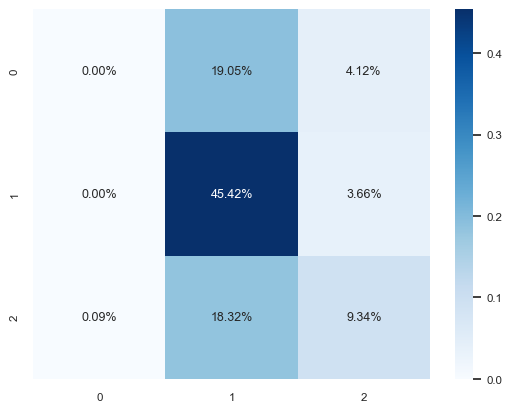

In [79]:
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [80]:
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score
multilabel_confusion_matrix(resultados_Y['Real'], resultados_Y['Predictions'])

array([[[838,   1],
        [253,   0]],

       [[148, 408],
        [ 40, 496]],

       [[704,  85],
        [201, 102]]])

In [81]:
resultados_Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (E,)              1092 non-null   float64
 1   (L,)              1092 non-null   float64
 2   (V,)              1092 non-null   float64
 3   (Real,)           1092 non-null   object 
 4   (Predictions,)    1092 non-null   object 
 5   (Doble Opcion1,)  1092 non-null   object 
 6   (Doble Opcion2,)  1092 non-null   object 
 7   (Aciertos,)       1092 non-null   int64  
 8   (Apuntes Real,)   1092 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 76.9+ KB


In [82]:
# Errores
VA_tabla = resultados_Y.copy()
VA_tabla.to_csv('VA_tabla.csv',index=False)

In [83]:
resultados_Y['Doble Opcion2'].value_counts()

(Doble Opcion2,)
LE                  393
LV                  290
L                   221
VL                   93
VE                   64
V                    31
dtype: int64

In [84]:
Va_tabla1 = pd.read_csv('VA_tabla.csv')
Va_tabla1 = Va_tabla1[(Va_tabla1['Apuntes Real'] == 'VA')]
Va_tabla1

,E,L,V,Real,Predictions,Doble Opcion1,Doble Opcion2,Aciertos,Apuntes Real
7,0.259396,0.530998,0.209606,V,L,LE,LE,0,VA
12,0.154098,0.760253,0.085649,V,L,L,L,0,VA
14,0.260387,0.456476,0.283137,E,L,LE,LV,0,VA
19,0.264005,0.513932,0.222063,V,L,LE,LE,0,VA
20,0.227759,0.526165,0.246076,E,L,LE,LV,0,VA
...,...,...,...,...,...,...,...,...,...
1066,0.229667,0.613603,0.156730,E,L,L,L,0,VA
1070,0.294895,0.437331,0.267774,V,L,LE,LE,0,VA
1076,0.277692,0.439163,0.283145,E,L,LE,LV,0,VA
1083,0.275662,0.371302,0.353036,E,L,LE,LV,0,VA


In [85]:
Va_tabla1['Doble Opcion2'].value_counts()

LE    93
LV    75
L     57
VL    25
VE    12
V     10
Name: Doble Opcion2, dtype: int64

In [86]:
Reparto_errores = pd.DataFrame(list(zip(resultados_Y['Doble Opcion2'].value_counts(),Va_tabla1['Doble Opcion2'].value_counts())),columns=['Reparto Pred','Nª Errores'])
Reparto_errores['% Errores'] = round(Reparto_errores['Nª Errores']/Reparto_errores['Reparto Pred'],2)
Reparto_errores

,Reparto Pred,Nª Errores,% Errores
0,393,93,0.24
1,290,75,0.26
2,221,57,0.26
3,93,25,0.27
4,64,12,0.19
5,31,10,0.32


In [87]:
resultados_Y['Real'].value_counts()

(Real,)
L          536
V          303
E          253
dtype: int64

In [88]:
resultados_Y['Predictions'].value_counts()

(Predictions,)
L                 904
V                 187
E                   1
dtype: int64

In [89]:
905/len(resultados_Y)

0.8287545787545788

# Mi mayor fallo... mi predicción recae mucho sobre el Local. 

In [90]:
36*4

144

In [91]:
model.classes_

array(['E', 'L', 'V'], dtype=object)